In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install wandb
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00


In [2]:
!git clone -b unet-gan https://github.com/hoangbros03/GAN-implement.git

# https://drive.google.com/file/d/1_0wdwSiL1dp-ewkVK2RD663fqmuL36BI/view?usp=sharing
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/img_align_celeba.zip", 'r') as zObject:
    zObject.extractall(path="celeb-a")

Cloning into 'GAN-implement'...
remote: Enumerating objects: 20536, done.
remote: Counting objects: 100% (278/278), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 20536 (delta 130), reused 241 (delta 99), pack-reused 20258
Receiving objects: 100% (20536/20536), 546.36 MiB | 34.39 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [4]:
import os
os.chdir('GAN-implement/src/cnn_gan')

In [7]:
from train import Trainer
from reader import Reader
import torch
import torch.nn as nn

In [8]:
dataroot = "/content/celeb-a"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
reader = Reader(dataroot=dataroot, batch_size=32, workers=2, image_size=64)
dataloader = reader.path_to_dataloader()

In [9]:
trainer = Trainer(device=device)
trainer.train_loop(dataloader, num_epochs=1, D_G_train_proportion=2)

  0%|          | 0/1 [04:08<?, ?it/s]


KeyboardInterrupt: ignored

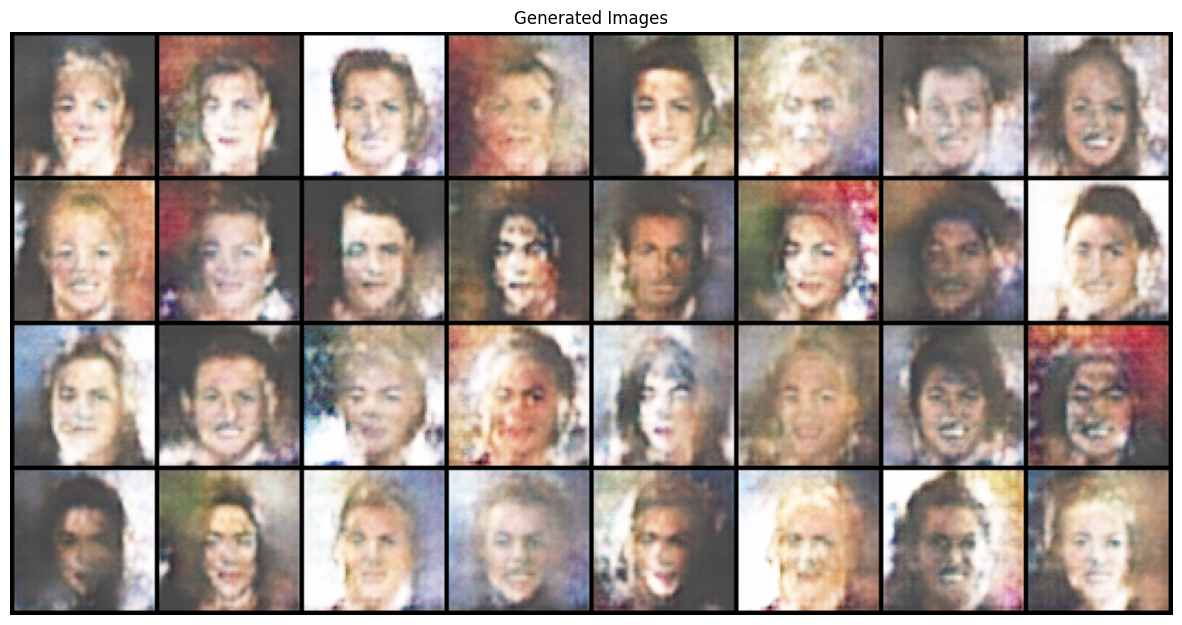

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

# # Grab a batch of real images from the dataloader
# real_batch = next(iter(dataloader))

# # Plot the real images
# plt.figure(figsize=(15,15))
# plt.subplot(1,2,1)
# plt.axis("off")
# plt.title("Real Images")
# plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.figure(figsize=(15, 15))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(trainer.img_list[-1],(1,2,0)))
plt.savefig('gan-1')
plt.show()

In [ ]:
Splt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(trainer.G_losses,label="G")
plt.plot(trainer.D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
os.chdir('..')
os.chdir('..')
os.chdir('evaluate')
from evaluate import convert_dataloader_to_sample, frechet_inception_distance

gt = convert_dataloader_to_sample(dataloader)
print(frechet_inception_distance(trainer.pred[-1], gt))